Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import papermill as pm
import logging
from IPython.display import Image, display


In [ ]:
#I found this helpful logger code online in a github issue post and modified it to suppress what I want, makes the output look nicer
class PapermillFilter(logging.Filter):
    def filter(self, record):
        #suppress these annoying console logs
        return not ('Executing Cell' in record.getMessage() or 'Ending Cell' in record.getMessage())

# Apply the custom filter to papermill's logger
logger = logging.getLogger('papermill')
logger.setLevel(logging.INFO)  #Info level will show ipynb prints
handler = logging.StreamHandler()
handler.addFilter(PapermillFilter())  # Apply our filter
logger.addHandler(handler)

Data Cleaning Pipeline

In [ ]:
#To run the data pipelin, run the pipeline.py file in 'streamliningData'
#You will need to have the data in a folder called 'baseData'

The graphs shown here are based on the BeerAdvocate data, since it contains the majority of the US data, and the RateBeer graphs are similar.

Preliminary data analysis: selecting the locations of interest <br>

Input Notebook:  modules/1.ipynb
Output Notebook: modules/1.ipynb
Executing notebook with kernel: python3
<Figure size 1200x800 with 2 Axes>


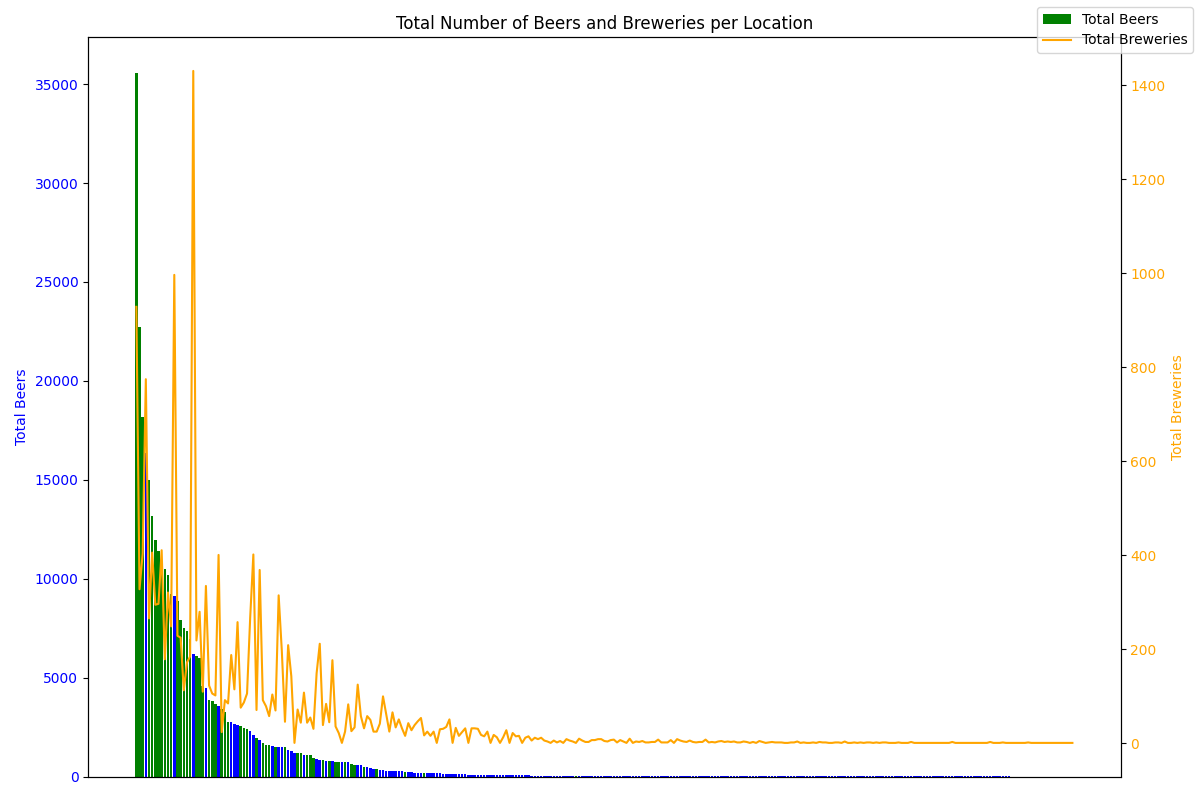

In [30]:
path = 'modules/1.ipynb'
pm.execute_notebook(
    path,
    path, #dont want to make new file
    log_output=True,
    progress_bar=False,
    report_mode=True
)

display(Image(filename='modules/1.png'))

In the figure above the green locations are US states and the blue represent all other countries, the orange line is breweries. We can see that most of the locations selling high amounts of beers are based in the US.

Input Notebook:  modules/2.ipynb
Output Notebook: modules/2.ipynb


Executing notebook with kernel: python3
Quick stats on the users
total number of users: 153704
Number of users with known locations: 122425
Users originate from:  194 different locations

<Figure size 1000x600 with 1 Axes>


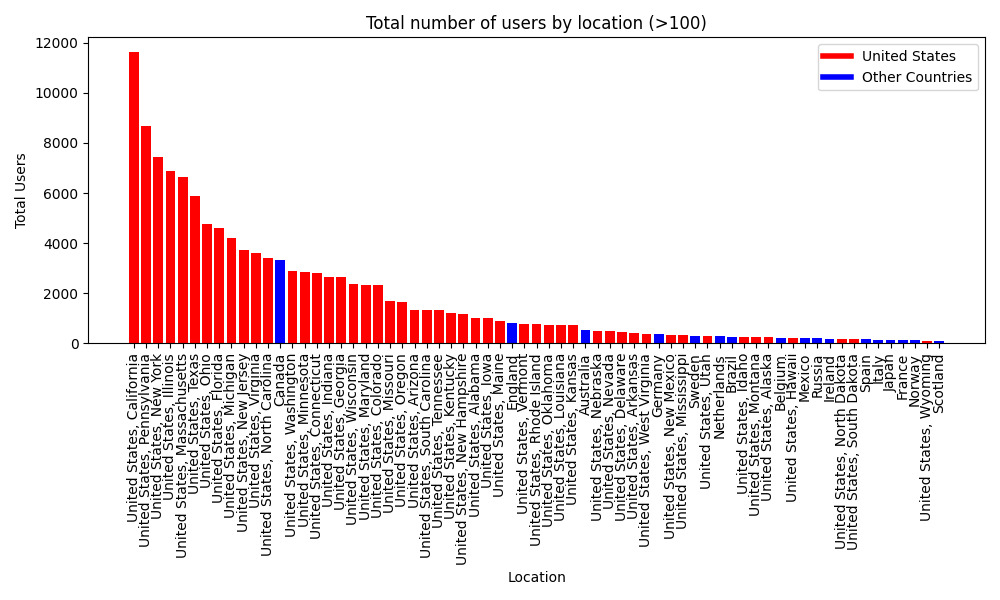

In [34]:
path = 'modules/2.ipynb'
pm.execute_notebook(
    path,
    path, #dont want to make new file
    log_output=True,
    progress_bar=False,
    report_mode=True
)

display(Image(filename='modules/2.png'))

The distribution of users by location of origin (location must have more than 100 users). Again we see most of them are from the US.

Input Notebook:  modules/3.ipynb
Output Notebook: modules/3.ipynb
Executing notebook with kernel: python3
<Figure size 1200x800 with 1 Axes>


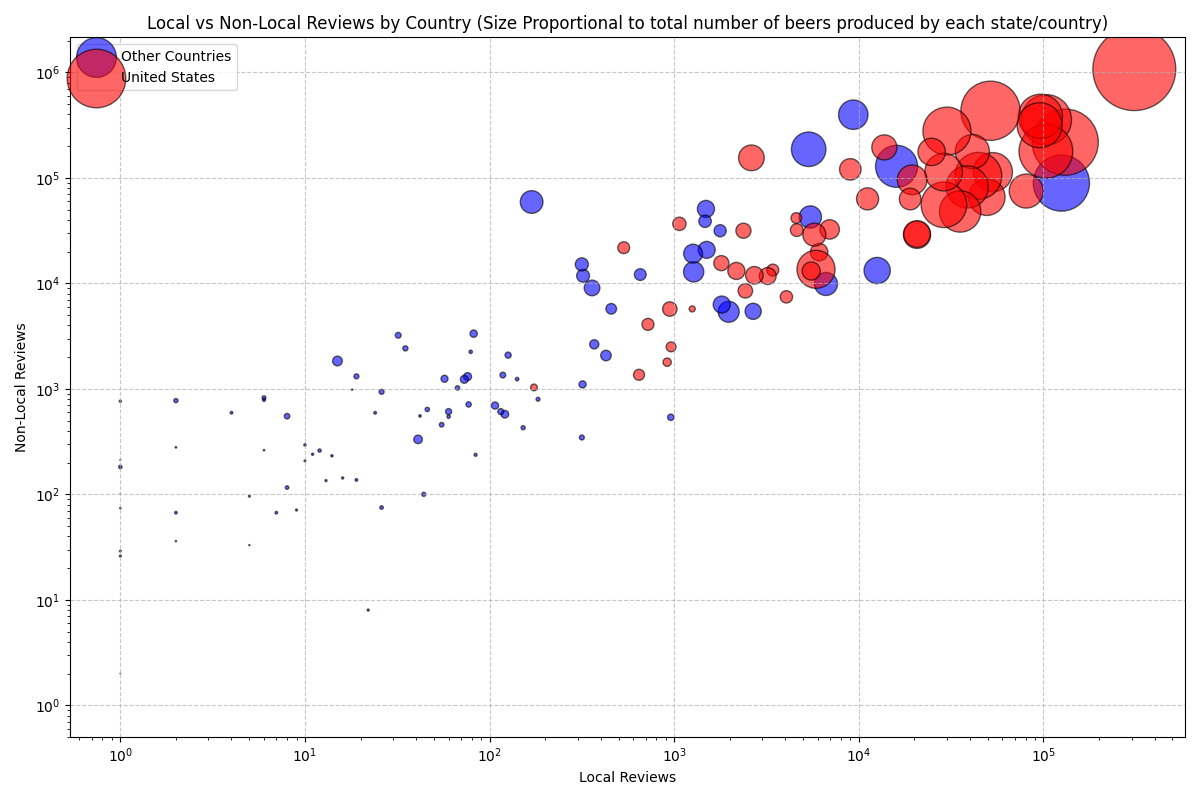

In [13]:
path = 'modules/3.ipynb'
pm.execute_notebook(
    path,
    path, #dont want to make new file
    log_output=True,
    progress_bar=False,
    report_mode=True
)

display(Image(filename='modules/3.png'))


Once again, the US dominates.

The number of beers produced by each location is proportional to the number of both local and non local reviews. We can see directly from the graphics that the US states as a substantial number of data points when looking at the number of beer produced, the number of reviews as well as the origin of the users. Therefore we will be restricting our analysis to the US states. Furthermore the distributions for all of these considerations decrease substantially for the countries on the lower end of the scale which is not interesting to us since we would not have enough data to analyse.

From here on out, we only look at US data.

Input Notebook:  modules/4.ipynb
Output Notebook: modules/4.ipynb
Executing notebook with kernel: python3
<Figure size 1200x1200 with 2 Axes>


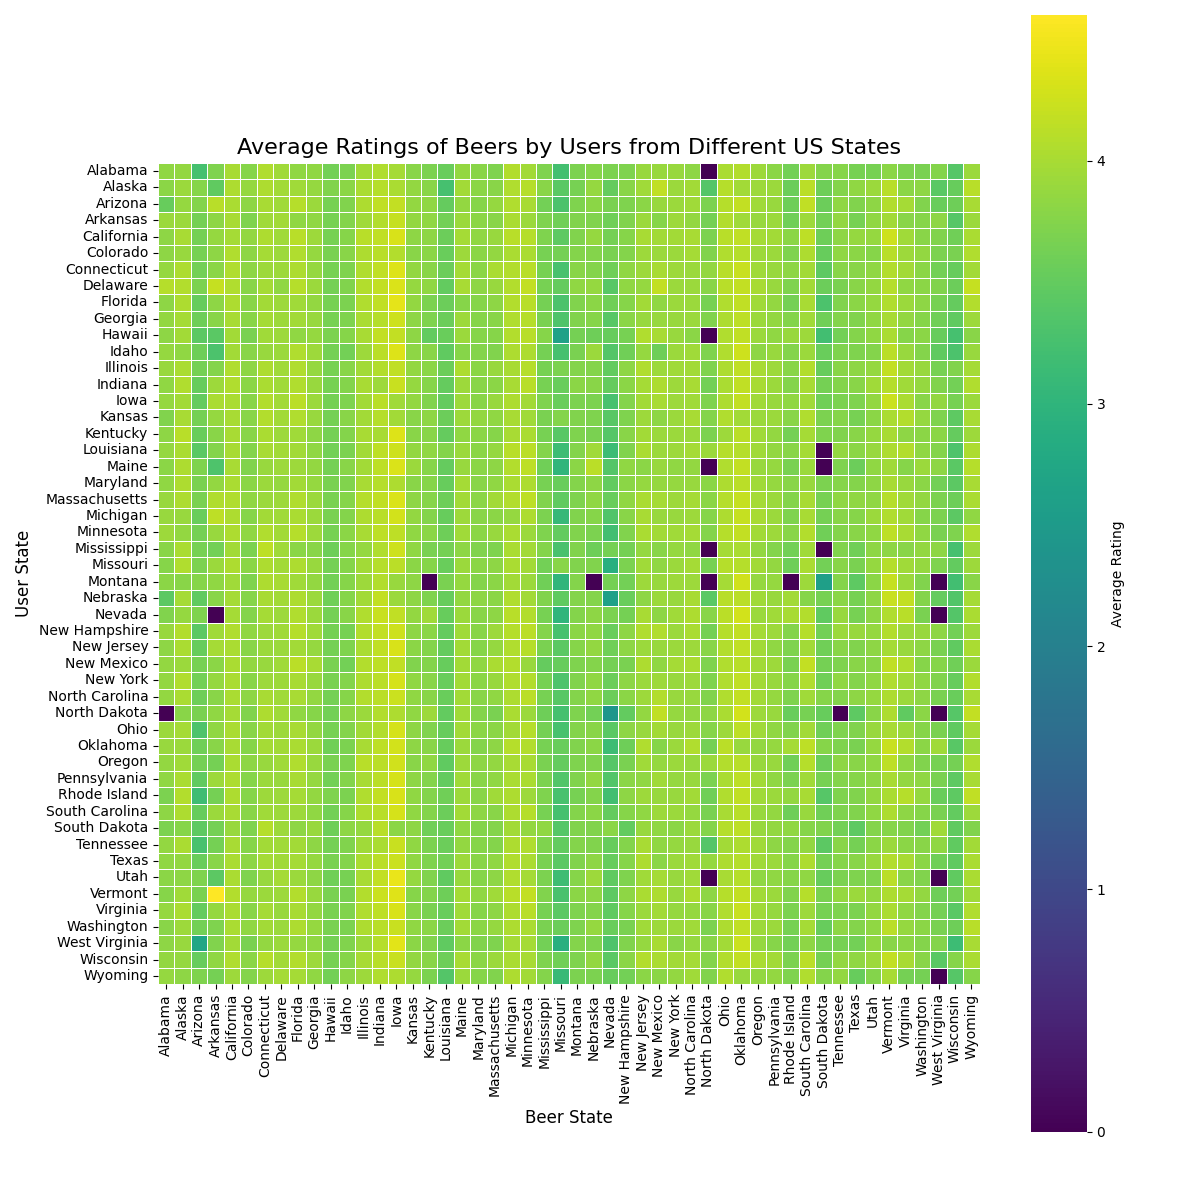

In [10]:
path = 'modules/4.ipynb'
pm.execute_notebook(
    path,
    path, #dont want to make new file
    log_output=True,
    progress_bar=False,
    report_mode=True
)

display(Image(filename='modules/4.png'))

We replaced NaNs with 0's here. Here we see average ratings of beers coming from a specificstate by users coming from a specific state. We were trying to see if any obvious patterns jumped out at us but it doesn't really seem so. All we can say is that beers coming from some states seem to be better rated than others, like Iowa.

Q1: Regional analysis, do states in a region have similar taste in beer?

We define regions as a state and its neighbours. So we have 50 regions, and a lot of overlap, which is fine.

Input Notebook:  modules/9.ipynb
Output Notebook: modules/9.ipynb
Executing notebook with kernel: python3
<Figure size 1200x800 with 1 Axes>


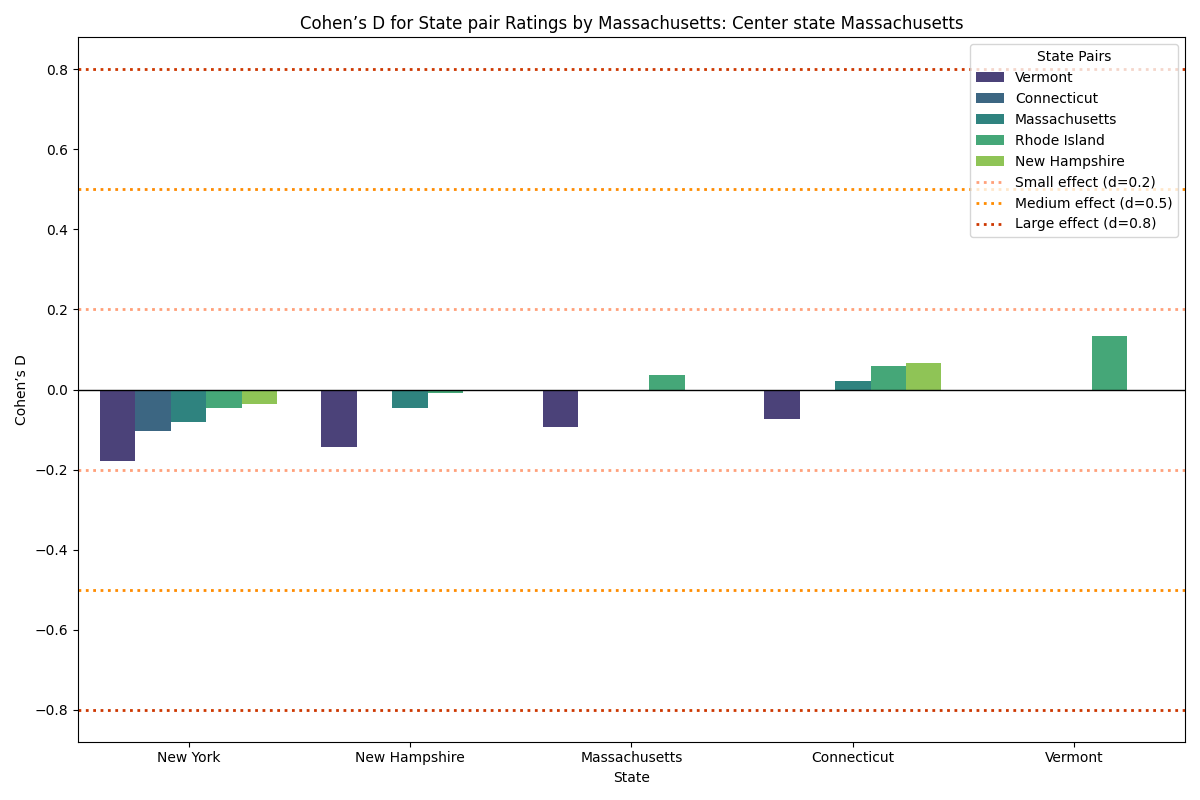

In [40]:
path = 'modules/9.ipynb'
pm.execute_notebook(
    path,
    path, #dont want to make new file
    log_output=True,
    progress_bar=False,
    report_mode=True
)

display(Image(filename='modules/9.png'))

We plotted only the Massachusetts centered region as an example. We calculate Cohen's D for each pair-wise interaction in the region, so we're looking at the distribution of beer ratings for beers coming from that region and rated by users from that region. We see a low Cohen's D, indicating that the states in the region have 'similar' or at the very least not significantly (in the Cohen's D sense) different distributions of ratings. Some regions do have inter-state differences (like the Missouri region), which is to expected.

Q2 Are regions biased when they rate each other?

Input Notebook:  modules/10.ipynb
Output Notebook: modules/10.ipynb
Executing notebook with kernel: python3
C:\Users\Enzo\AppData\Local\Temp\ipykernel_5164\4212025349.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cohen_by_region_df, x='Center State of each Region', y='Cohen_d', palette='viridis')

<Figure size 1400x800 with 1 Axes>


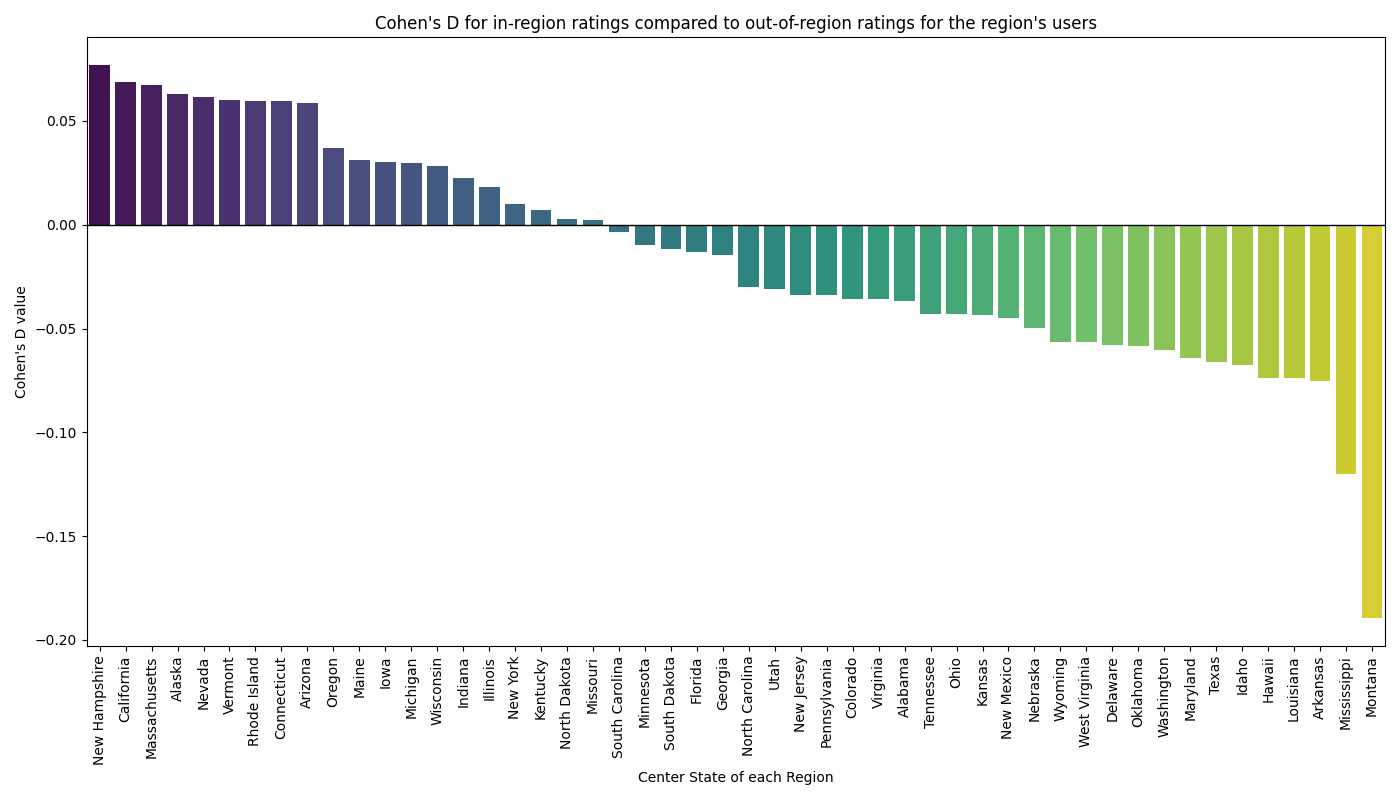

In [41]:
path = 'modules/10.ipynb'
pm.execute_notebook(
    path,
    path, #dont want to make new file
    log_output=True,
    progress_bar=False,
    report_mode=True
)

display(Image(filename='modules/10.png'))

When comparing regions to eachother, we don't really see many significant differences, theres maybe one region (Montana region) that could be different from the other regions. This is surprising! It also motivates us to look at biases on an individual state level.

Q3: State Specific analysis of in state and out state reviews

Input Notebook:  modules/5.ipynb
Output Notebook: modules/5.ipynb
Executing notebook with kernel: python3
C:\Users\Enzo\AppData\Local\Temp\ipykernel_16788\2584897655.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  other_state_avg_ratings = other_state_ratings.groupby('beer_state').apply(

<Figure size 1200x800 with 1 Axes>


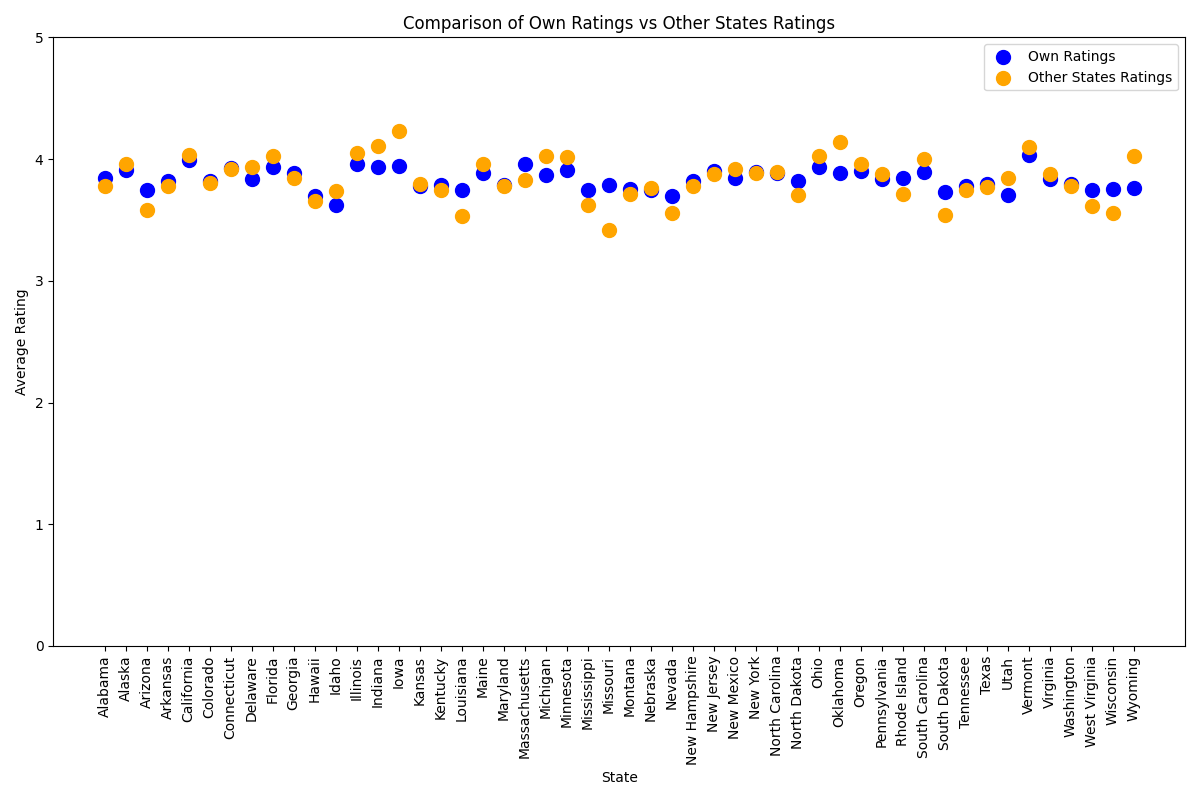

In [11]:
path = 'modules/5.ipynb'
pm.execute_notebook(
    path,
    path, #dont want to make new file
    log_output=True,
    progress_bar=False,
    report_mode=True
)

display(Image(filename='modules/5.png'))

Trying to see if theres any big differences, it doesn't seem so. So we'll next test for significance.

Input Notebook:  modules/6.ipynb
Output Notebook: modules/6.ipynb
Executing notebook with kernel: python3
C:\Users\Enzo\AppData\Local\Temp\ipykernel_22188\422579217.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(

<Figure size 1200x800 with 1 Axes>


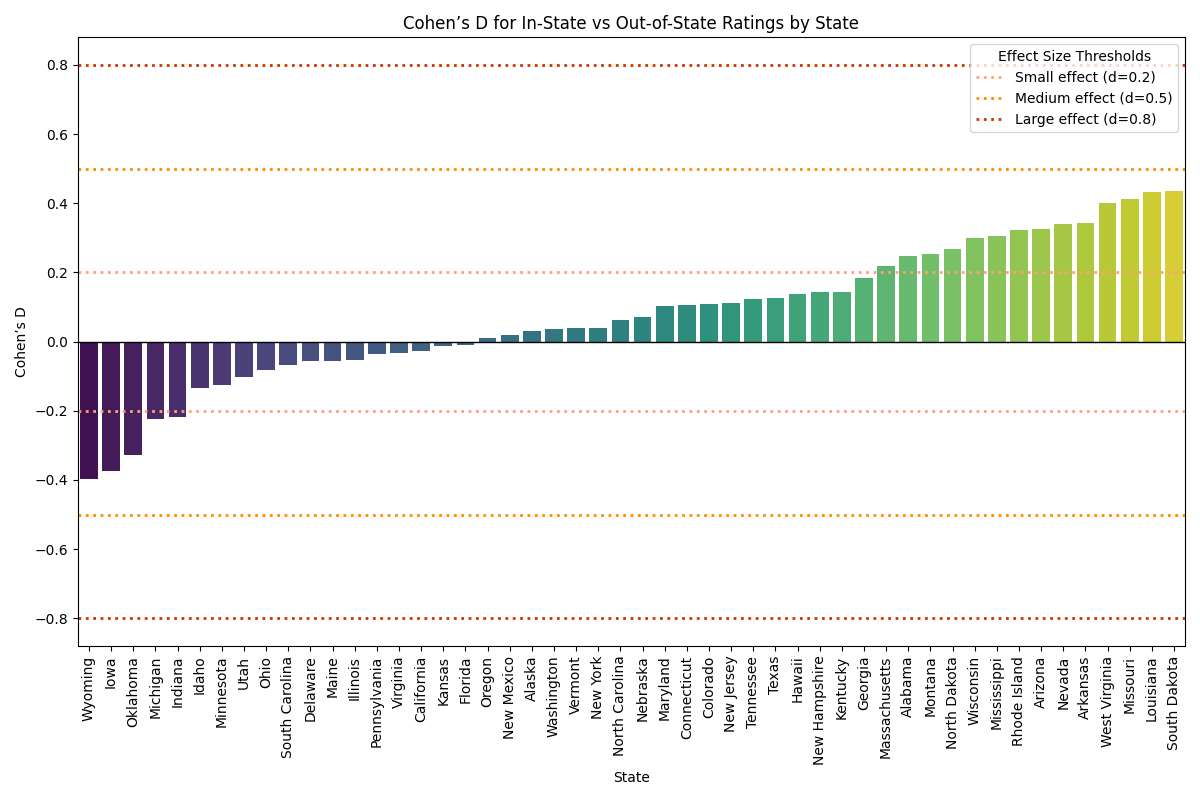

In [16]:
path = 'modules/6.ipynb'
pm.execute_notebook(
    path,
    path, #dont want to make new file
    log_output=True,
    progress_bar=False,
    report_mode=True
)

display(Image(filename='modules/6.png'))

We're using Cohen's D here since our sample sized is very big (in the milions!). Here we find that there are significant effect sizes for some of the states, cool!

Input Notebook:  modules/7.ipynb
Output Notebook: modules/7.ipynb
Executing notebook with kernel: python3
<Figure size 1200x800 with 2 Axes>


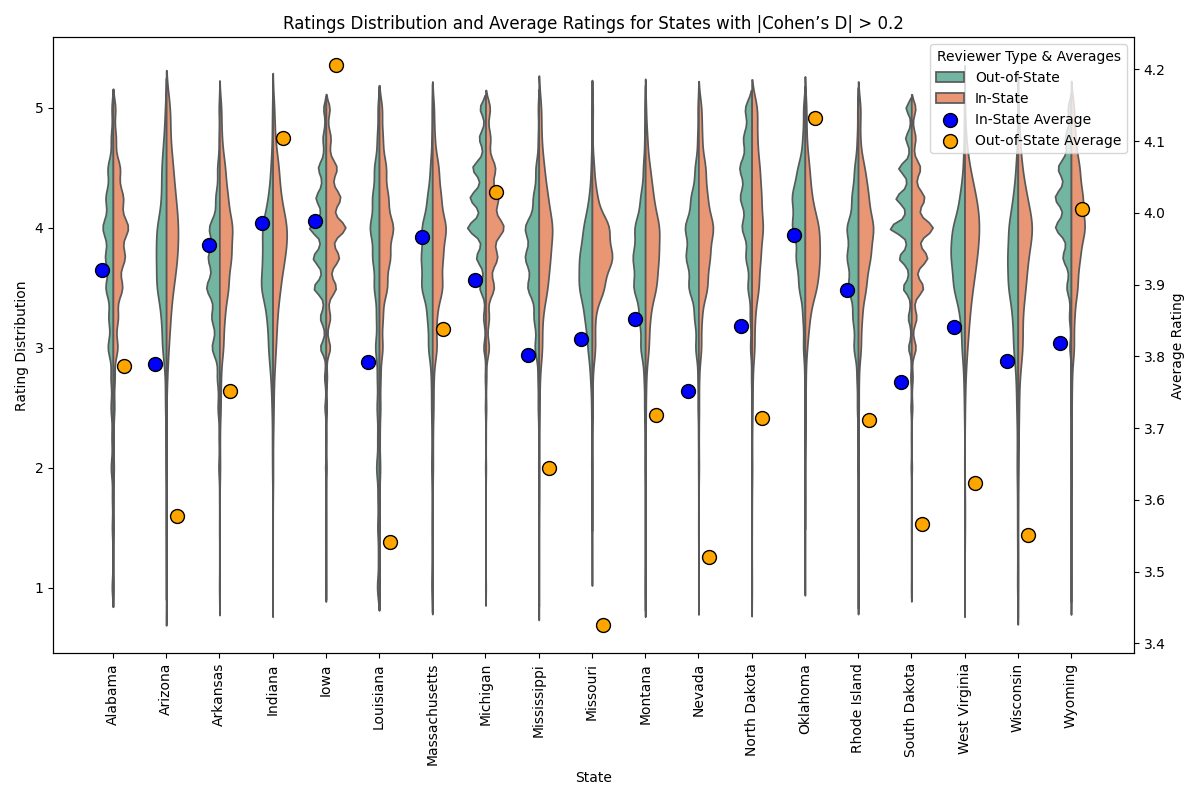

In [17]:
path = 'modules/7.ipynb'
pm.execute_notebook(
    path,
    path, #dont want to make new file
    log_output=True,
    progress_bar=False,
    report_mode=True
)

display(Image(filename='modules/7.png'))

Looking in detail at those significant states, we just wanted to get a general feel of what the distribution looked like.

Input Notebook:  modules/8.ipynb
Output Notebook: modules/8.ipynb
Executing notebook with kernel: python3
C:\Users\Enzo\AppData\Local\Temp\ipykernel_2968\1797041839.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=state_results, y='state', x='difference', palette='coolwarm', orient='h')

<Figure size 1200x800 with 1 Axes>


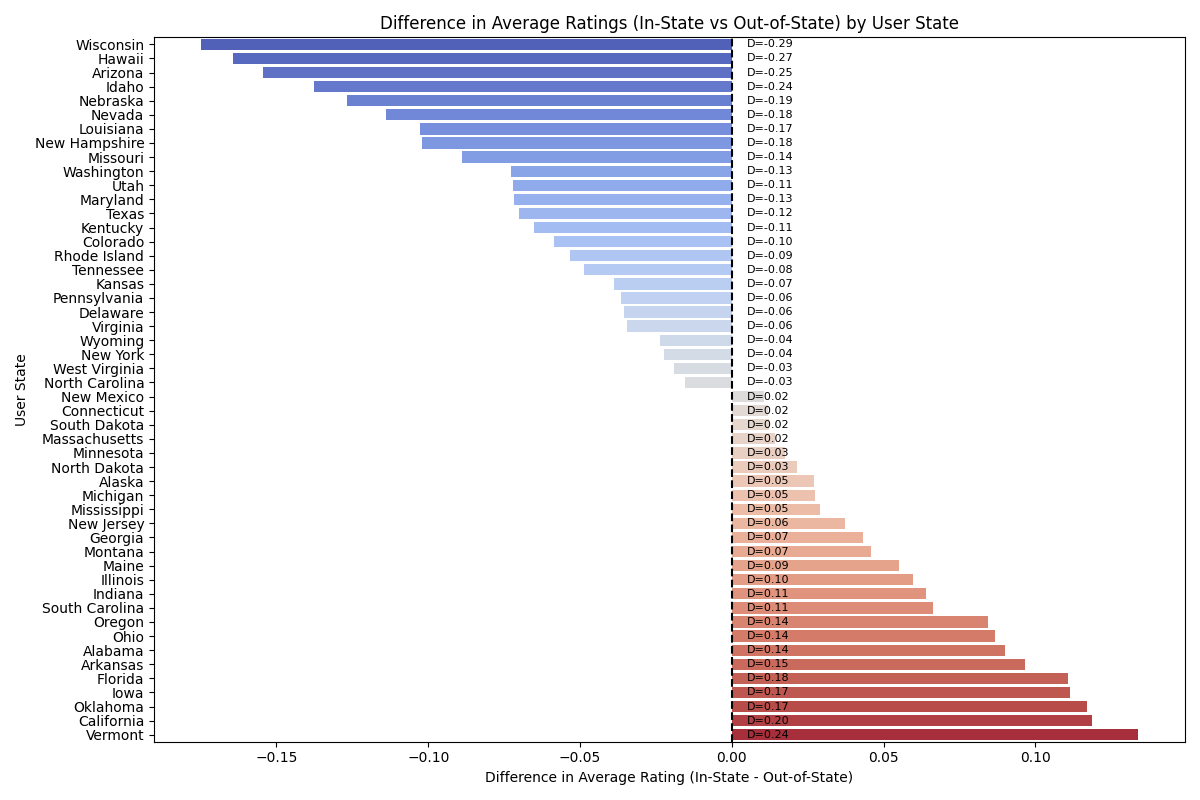

In [19]:
path = 'modules/8.ipynb'
pm.execute_notebook(
    path,
    path, #dont want to make new file
    log_output=True,
    progress_bar=False,
    report_mode=True
)

display(Image(filename='modules/8.png'))

Here we are plotting the difference in averages with the significance (Cohen's D) level.

Conclusion: There are significant differences between distribution of ratings, even on a state level!

For questions 4, we're still working on it, but we dont really have significant results...

For question 5, we have not started working on it yet.

Thanks for reading!